In [ ]:
!pip install earthengine-api

In [ ]:
import ee
ee.Authenticate()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data preprocessing

Importing Data

In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Interview Prep/AI ML/3946770.csv")
data.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,AWND_ATTRIBUTES,FMTM,FMTM_ATTRIBUTES,...,WT05,WT05_ATTRIBUTES,WT07,WT07_ATTRIBUTES,WT08,WT08_ATTRIBUTES,WT14,WT14_ATTRIBUTES,WT16,WT16_ATTRIBUTES
0,USW00023244,"MOFFETT FEDERAL AIRFIELD, CA US",37.4058,-122.0481,11.9,1990-01-01,2.1,",,X",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00023244,"MOFFETT FEDERAL AIRFIELD, CA US",37.4058,-122.0481,11.9,1990-01-02,4.2,",,X",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00023244,"MOFFETT FEDERAL AIRFIELD, CA US",37.4058,-122.0481,11.9,1990-01-03,1.6,",,X",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00023244,"MOFFETT FEDERAL AIRFIELD, CA US",37.4058,-122.0481,11.9,1990-01-04,1.0,",,X",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00023244,"MOFFETT FEDERAL AIRFIELD, CA US",37.4058,-122.0481,11.9,1990-01-05,1.2,",,X",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data['TMAX'] = data['TMAX'].round(2)

In [ ]:
max_TMAX_value = data['TMAX'].max()
max_TMAX_value

41.1

In [ ]:
rows = data[data['TMAX'] == 41.1]
rows

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,AWND_ATTRIBUTES,FMTM,FMTM_ATTRIBUTES,...,WT05,WT05_ATTRIBUTES,WT07,WT07_ATTRIBUTES,WT08,WT08_ATTRIBUTES,WT14,WT14_ATTRIBUTES,WT16,WT16_ATTRIBUTES
2816,USW00023244,"MOFFETT FEDERAL AIRFIELD, CA US",37.4058,-122.0481,11.9,2000-06-14,2.7,",,W",1816.0,",,W",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9055,USW00023244,"MOFFETT FEDERAL AIRFIELD, CA US",37.4058,-122.0481,11.9,2017-09-01,1.5,",,W",NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,",,W",NaN,NaN,NaN,NaN
9056,USW00023244,"MOFFETT FEDERAL AIRFIELD, CA US",37.4058,-122.0481,11.9,2017-09-02,1.6,",,W",NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,",,W",NaN,NaN,NaN,NaN


In [ ]:
data[['TMAX','PRCP']]

,TMAX,PRCP
0,13.3,12.7
1,13.9,0.0
2,13.9,0.0
3,12.8,0.0
4,15.0,0.0
...,...,...
9852,NaN,0.0
9853,NaN,0.0
9854,NaN,0.0
9855,NaN,0.0


In [ ]:
import ee

# Authenticate and Initialize Earth Engine
ee.Authenticate()
ee.Initialize(project='unique-hour-452315-b6')

# Define the Area of Interest (Square Bounding Box) - MODIFIED
# The coordinates were likely incorrect causing a very large AOI
square_aoi = ee.Geometry.Rectangle([-122.0481, 37.4058, -121.0481, 38.4058])  # Modified with plausible coordinates


# Select a satellite image collection (Sentinel-2 Surface Reflectance)
collection = ee.ImageCollection('COPERNICUS/S2_SR') \
    .filterBounds(square_aoi) \
    .filterDate('1990-01-01', '2019-11-17') \
    .select(['B8', 'B4'])

# Compute NDVI
ndvi = collection.median().normalizedDifference(['B8', 'B4']).rename('NDVI')

# Sample NDVI values as a list - MODIFIED
# Reduced numPixels to lower memory usage
ndvi_values = ndvi.sample(
    region=square_aoi,
    scale=10,  # Reduced scale for better performance
    numPixels=10,  # Reduced number of pixels for lower memory usage
    geometries=True  # Include coordinates
).getInfo()



/usr/local/lib/python3.11/dist-packages/ee/deprecation.py:207: DeprecationWarning: 

Attention required for COPERNICUS/S2_SR! You are using a deprecated asset.
To make sure your code keeps working, please update it.
Learn more: https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S2_SR

  warnings.warn(warning, category=DeprecationWarning)


In [ ]:
# Extract and print NDVI values
ndvi_list = [(f["geometry"]["coordinates"], f["properties"]["NDVI"]) for f in ndvi_values["features"]]

for coords, ndvi_value in ndvi_list:
    coords = [round(coords[0]), round(coords[1])]
    print(f"{coords}, {ndvi_value}")

[-121, 38], 0.10190013256738839
[-121, 37], 0.44881731253145446
[-122, 38], 0.19436448669068318
[-121, 38], 0.5043537202148183
[-122, 38], 0.6631473102061337
[-121, 38], 0.24838546638962206
[-122, 38], 0.5618445254767821
[-122, 38], 0.23624510702696416
[-122, 38], 0.5772165840610495
[-122, 38], 0.8667894312819584


In [ ]:
# Convert NOAA DATE column to datet
data['DATE'] = pd.to_datetime(data['DATE'])

# Aggregate GEE data (e.g., monthly NDVI average)
# Assuming ndvi_values is a dictionary with monthly averages
gee_data = pd.DataFrame({
    'DATE': data['DATE'],  # Example DATE
    'NDVI':  0.44881731253145446 # Example NDVI value
})

# Merge GEE and NOAA data on the 'DATE' column
combined_data = pd.merge(gee_data, data, on='DATE', how='inner')

print(combined_data)

           DATE      NDVI      STATION                             NAME  \
0    1990-01-01  0.448817  USW00023244  MOFFETT FEDERAL AIRFIELD, CA US   
1    1990-01-02  0.448817  USW00023244  MOFFETT FEDERAL AIRFIELD, CA US   
2    1990-01-03  0.448817  USW00023244  MOFFETT FEDERAL AIRFIELD, CA US   
3    1990-01-04  0.448817  USW00023244  MOFFETT FEDERAL AIRFIELD, CA US   
4    1990-01-05  0.448817  USW00023244  MOFFETT FEDERAL AIRFIELD, CA US   
...         ...       ...          ...                              ...   
9852 2019-11-13  0.448817  USW00023244  MOFFETT FEDERAL AIRFIELD, CA US   
9853 2019-11-14  0.448817  USW00023244  MOFFETT FEDERAL AIRFIELD, CA US   
9854 2019-11-15  0.448817  USW00023244  MOFFETT FEDERAL AIRFIELD, CA US   
9855 2019-11-16  0.448817  USW00023244  MOFFETT FEDERAL AIRFIELD, CA US   
9856 2019-11-17  0.448817  USW00023244  MOFFETT FEDERAL AIRFIELD, CA US   

      LATITUDE  LONGITUDE  ELEVATION  AWND AWND_ATTRIBUTES  FMTM  ... WT05  \
0      37.4058  -122.

In [ ]:
import numpy as np
import seaborn as sns

combined_data['NDVI'] = np.where(combined_data['LATITUDE'] < 38, 0.44881731253145446, 0.8667894312819584)

In [ ]:
combined_data.to_csv("combined_gee_noaa_data.csv", index=False)


In [ ]:
combined_data.head()

,DATE,NDVI,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,AWND,AWND_ATTRIBUTES,FMTM,...,WT05,WT05_ATTRIBUTES,WT07,WT07_ATTRIBUTES,WT08,WT08_ATTRIBUTES,WT14,WT14_ATTRIBUTES,WT16,WT16_ATTRIBUTES
0,1990-01-01,0.448817,USW00023244,"MOFFETT FEDERAL AIRFIELD, CA US",37.4058,-122.0481,11.9,2.1,",,X",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-01-02,0.448817,USW00023244,"MOFFETT FEDERAL AIRFIELD, CA US",37.4058,-122.0481,11.9,4.2,",,X",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1990-01-03,0.448817,USW00023244,"MOFFETT FEDERAL AIRFIELD, CA US",37.4058,-122.0481,11.9,1.6,",,X",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1990-01-04,0.448817,USW00023244,"MOFFETT FEDERAL AIRFIELD, CA US",37.4058,-122.0481,11.9,1.0,",,X",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1990-01-05,0.448817,USW00023244,"MOFFETT FEDERAL AIRFIELD, CA US",37.4058,-122.0481,11.9,1.2,",,X",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
combined_data.columns

Index(['DATE', 'NDVI', 'STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION',
       'AWND', 'AWND_ATTRIBUTES', 'FMTM', 'FMTM_ATTRIBUTES', 'PGTM',
       'PGTM_ATTRIBUTES', 'PRCP', 'PRCP_ATTRIBUTES', 'SNOW', 'SNOW_ATTRIBUTES',
       'SNWD', 'SNWD_ATTRIBUTES', 'TAVG', 'TAVG_ATTRIBUTES', 'TMAX',
       'TMAX_ATTRIBUTES', 'TMIN', 'TMIN_ATTRIBUTES', 'WDF2', 'WDF2_ATTRIBUTES',
       'WDF5', 'WDF5_ATTRIBUTES', 'WDFG', 'WDFG_ATTRIBUTES', 'WSF2',
       'WSF2_ATTRIBUTES', 'WSF5', 'WSF5_ATTRIBUTES', 'WSFG', 'WSFG_ATTRIBUTES',
       'WT01', 'WT01_ATTRIBUTES', 'WT02', 'WT02_ATTRIBUTES', 'WT03',
       'WT03_ATTRIBUTES', 'WT04', 'WT04_ATTRIBUTES', 'WT05', 'WT05_ATTRIBUTES',
       'WT07', 'WT07_ATTRIBUTES', 'WT08', 'WT08_ATTRIBUTES', 'WT14',
       'WT14_ATTRIBUTES', 'WT16', 'WT16_ATTRIBUTES'],
      dtype='object')

In [ ]:
combined_data.fillna(0, inplace=True)

In [ ]:
combined_data.shape

(9857, 55)

In [ ]:
conmbined_data_filtered = combined_data[combined_data['TMAX'] != 0.0]

In [ ]:
conmbined_data_filtered.shape

(9400, 55)

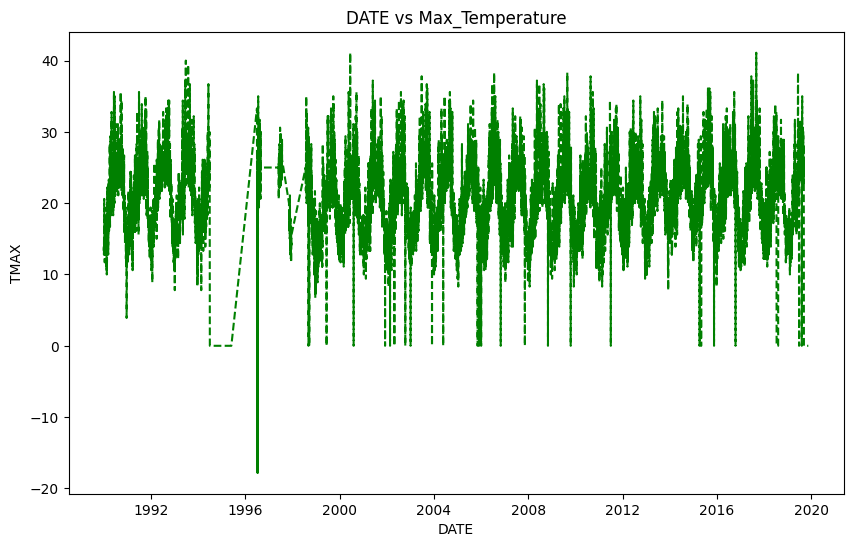

In [ ]:
import matplotlib.pyplot as plt

# Plot NDVI vs Temperature
plt.figure(figsize=(10, 6))
plt.plot(combined_data['DATE'], combined_data['TMAX'], 'g--')
plt.ylabel('TMAX')
plt.xlabel('DATE')
plt.title('DATE vs Max_Temperature')
plt.show()


Column Name	Description
- STATION:	Station ID or identifier
- NAME	Name of the weather station.
- LATITUDE	Latitude of the station.
- LONGITUDE	Longitude of the station.
- ELEVATION	Elevation of the station.
- DATE	Date of the observation.
- AWND	Average wind speed.
- PGTM	Peak gust time (time of the highest wind gust).
- PRCP	Precipitation (in inches or millimeters).
- SNOW	Snowfall (in inches or centimeters).
- SNWD	Snow depth (in inches or centimeters).
- TAVG	Average temperature.
- TMAX	Maximum temperature.
- TMIN	Minimum temperature.
- WDF2	Direction of the fastest 2-minute wind.
- WDF5	Direction of the fastest 5-minute wind.
- WSF2	Fastest 2-minute wind speed.
- WSF5	Fastest 5-minute wind speed.
- WT01 to WT08	Weather type codes (e.g., fog, rain, snow, etc.).

In 2017-09-01 there was Wildfire, this year properties will be critical conditions

In [ ]:
combined_data['CHANCE'] = 0
combined_data.loc[combined_data['PRCP'] < 0.39, 'CHANCE'] = combined_data['TMAX'] / 41.1

<ipython-input-23-6d1fd5bb37cf>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.33819951 0.33819951 0.31143552 ... 0.         0.         0.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  combined_data.loc[combined_data['PRCP'] < 0.39, 'CHANCE'] = combined_data['TMAX'] / 41.1


In [ ]:
features = ['AWND', 'NDVI', 'PGTM', 'PRCP', 'TAVG', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5', 'WT01', 'WT02', 'WT03', 'WT04', 'WT05', 'WT07', 'WT08', 'WT14', 'WT16', 'TMAX']
target = 'CHANCE'

# Create feature and target datasets
X = combined_data[features]
Y = combined_data[target]

<Axes: >

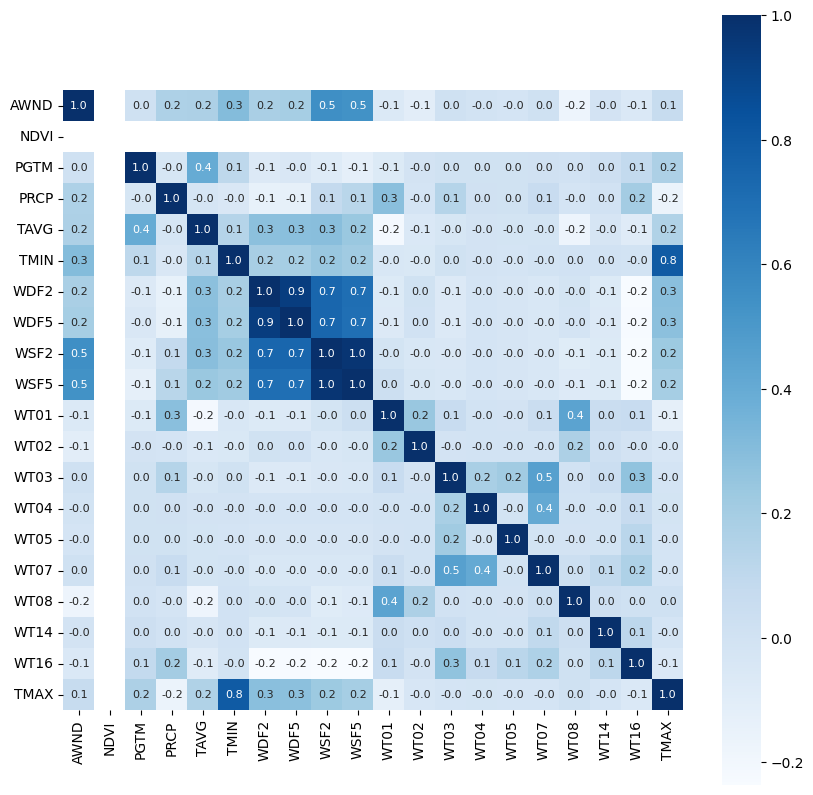

In [ ]:
correlation = X.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
Y = Y.round(2)

In [ ]:
X_df = pd.DataFrame(X, columns=features)  # Assuming 'features' is defined earlier
X_df.to_csv('X_df.csv', index=False)
legit_sample_vectors = X_df.sample(n = 500)
legit_sample_vectors.to_csv('legit_sample.csv', index=False)

In [ ]:
legit_sample_df = pd.read_csv('/content/legit_sample.csv')


In [ ]:
legit_sample_df.head()

,AWND,NDVI,PGTM,PRCP,TAVG,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT14,WT16,TMAX
0,2.5,0.448817,1420.0,0.0,17.2,11.7,290.0,320.0,9.4,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.2
1,2.7,0.448817,1548.0,0.0,0.0,14.4,350.0,350.0,8.1,9.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.6
2,2.2,0.448817,1519.0,0.0,20.0,13.3,340.0,340.0,8.0,9.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.1
3,1.3,0.448817,1531.0,0.0,0.0,14.4,340.0,340.0,5.8,6.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.9
4,0.8,0.448817,1520.0,0.0,0.0,8.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.1


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
X = standardized_data

In [ ]:
scaler = StandardScaler()
scaler.fit(legit_sample_df)
standardized_data = scaler.transform(legit_sample_df)
legit_sample_df = standardized_data

legit_sample_df = pd.DataFrame(legit_sample_df, columns=features)
legit_sample_df.to_csv('legit_sample_vectors.csv', index=False)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)


# **Model Training**

# Neural Network

In [ ]:
from tensorflow.keras import optimizers

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    BatchNormalization(),  # Normalize activations
    Dropout(0.5),  # Regularization to prevent overfitting
    Dense(64, activation='relu'),  # Hidden layer
    Dropout(0.5),
    Dense(1)
])

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=2e-5), loss='mse', metrics=['acc'])
# model.compile(optimizer='adam', loss='mse', metrics=['mae'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(
    X_train, Y_train,
    validation_split=0.1,
    epochs=50,
    verbose=1
)


Epoch 1/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - acc: 0.0638 - loss: 4.6680 - val_acc: 0.0976 - val_loss: 0.3689
Epoch 2/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.0791 - loss: 4.1942 - val_acc: 0.0963 - val_loss: 0.5028
Epoch 3/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.0815 - loss: 4.0948 - val_acc: 0.1115 - val_loss: 0.4829
Epoch 4/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.0927 - loss: 3.5613 - val_acc: 0.1305 - val_loss: 0.4605
Epoch 5/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.0967 - loss: 3.4123 - val_acc: 0.1356 - val_loss: 0.4375
Epoch 6/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.0906 - loss: 3.1791 - val_acc: 0.1432 - val_loss: 0.4106
Epoch 7/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.0966 - loss: 2.9560 - val_acc: 0.1470 - val_loss: 0.3962
Epoch 8/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.1011 - loss: 2.9125 - val_acc: 0.1483 - val_loss: 0.3943
Epoch 9/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - ac

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print('Test Accuracy =', accuracy)

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.1870 - loss: 0.1484
Test Accuracy = 0.17799188196659088


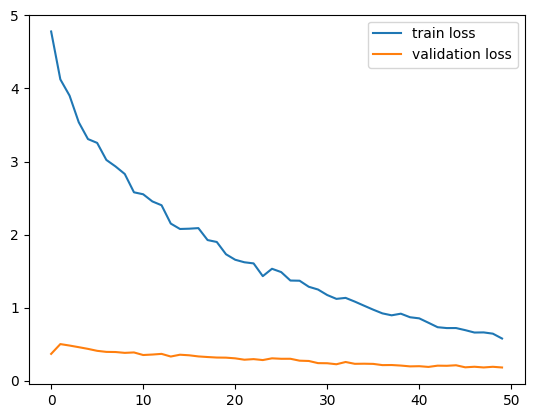

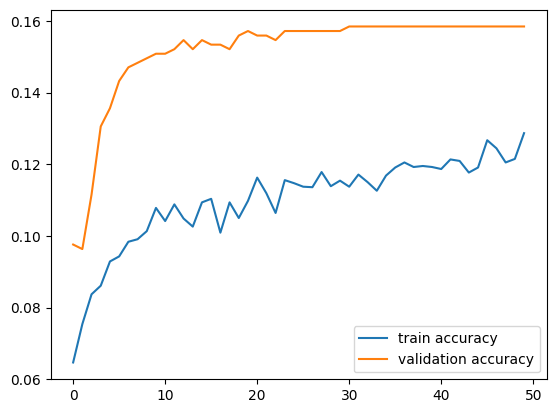

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

# XGboost


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score # Import r2_scor

# Train an XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, Y_train)

# Evaluate the model
Y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f'Test MSE: {mse}')
print(f'R-squared: {r2}')

Test MSE: 0.0001868002229719638
R-squared: 0.9965061835839025


# Compairing two models XGboost is better performer

testing XGboost

In [ ]:
Y_pred = xgb_model.predict([X[4]])

In [ ]:
Y_pred

array([0.36000192], dtype=float32)

# Saving data

In [ ]:
import pickle
filename = 'XGboost_wildfire_pred_model.sav'
pickle.dump(xgb_model, open(filename, 'wb'))

In [ ]:
import joblib
joblib.dump(xgb_model, 'model.pkl')

['model.pkl']

# RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

# Evaluate
Y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(Y_test, Y_pred_rf)
r2_rf = r2_score(Y_test, Y_pred_rf)
print(f'Random Forest - MSE: {mse_rf}, R²: {r2_rf}')

Random Forest - MSE: 3.4800917849898555e-05, R²: 0.9993491013225531


In [ ]:
import sys
print(sys.version)

3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0
